# ANTEA (I)PYTHON INTRODUCTION <br> Scientific Python environment

> *ANTEA Python Workshop*  
> *March 9 and 11, 2015*

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

# Pandas data analysis - case VMM air quality data

## Introduction

The air quality data of the VMM monitoring stations, obtained through a SOS of IRCEL. More info: http://www.irceline.be/nl/luchtkwaliteit/metingen

In [1]:
!head -5 data/sos_bc_data.txt

41N043 20140315  -9999.0      1.9      1.8      2.0      2.0      2.6      2.4      2.3      1.9      2.1      0.9      0.7      0.7      0.8      0.8      1.4      1.2      2.1      3.7      3.2      2.9      3.6      1.8      1.8
41N043 20140316      1.6      1.2      1.2      1.8      1.9      1.5      1.5      1.6      1.5      1.6      1.9      1.9      1.9      1.8      2.2      2.2      2.2      2.0      3.1      8.8      7.1      5.1      2.9      2.6
41N043 20140317      2.1  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
41N043 20140318  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
41N043 20140319  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0  -

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

C:\Anaconda\lib\site-packages\pytz\__init__.py:29: UserWarning: Module argparse was already imported from C:\Anaconda\lib\argparse.pyc, but c:\anaconda\lib\site-packages is being added to sys.path
  from pkg_resources import resource_stream


## Importing the data

Read in data (and convert -9999 to NaN):

In [3]:
data = pd.read_csv("data/sos_bc_data.txt", header=None, delimiter="\s+", na_values=[-9999])

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,41N043,20140315,NaN,1.9,1.8,2.0,2.0,2.6,2.4,2.3,...,0.8,1.4,1.2,2.1,3.7,3.2,2.9,3.6,1.8,1.8
1,41N043,20140316,1.6,1.2,1.2,1.8,1.9,1.5,1.5,1.6,...,2.2,2.2,2.2,2.0,3.1,8.8,7.1,5.1,2.9,2.6
2,41N043,20140317,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41N043,20140318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41N043,20140319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Give column names:

In [5]:
data.columns = ['station', 'date', '00', '01', '02', '03', '04', '05', '06', 
                '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', 
                '17', '18', '19', '20', '21', '22', '23']

In [6]:
data.head()

,station,date,00,01,02,03,04,05,06,07,...,14,15,16,17,18,19,20,21,22,23
0,41N043,20140315,NaN,1.9,1.8,2.0,2.0,2.6,2.4,2.3,...,0.8,1.4,1.2,2.1,3.7,3.2,2.9,3.6,1.8,1.8
1,41N043,20140316,1.6,1.2,1.2,1.8,1.9,1.5,1.5,1.6,...,2.2,2.2,2.2,2.0,3.1,8.8,7.1,5.1,2.9,2.6
2,41N043,20140317,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41N043,20140318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41N043,20140319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['station'].unique()

array(['41N043', '41R001', '41R002', '41R012', '41WOL1', '44M705', '44N029'], dtype=object)

Now, we want to reshape it: our goal is to have different columns with the different stations, and have the different hours as rows.

### Intermezzo: reshaping with `stack` and `unstack`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.


<img src="img/stack.png">

In [8]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})

In [9]:
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [10]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [11]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [12]:
result.stack().reset_index()

,A,B,0
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [13]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [14]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


In [15]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [16]:
df.pivot_table(index='A', columns='B', values='C', aggfunc='count')

B,a,b
A,,
one,2,1
two,1,2


In [17]:
df.pivot_table(index='A', columns='B', values='C', aggfunc='mean')

B,a,b
A,,
one,2,1
two,2,4


### Back to our VMM data

We start with reshaping it to one column, with the different hours also as rows. Herefore, we can use the `stack` method as seen above.

**Exercise**: reshape the dataframe so the stations are used as columns and the hours as rows

In [18]:
data = data.set_index(['station', 'date'])

In [19]:
data.head()

00   01   02   03   04   05   06   07   08   09 ...    14  \
station date                                                       ...         
41N043  20140315  NaN  1.9  1.8  2.0  2.0  2.6  2.4  2.3  1.9  2.1 ...   0.8   
        20140316  1.6  1.2  1.2  1.8  1.9  1.5  1.5  1.6  1.5  1.6 ...   2.2   
        20140317  2.1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   
        20140318  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   
        20140319  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   

                   15   16   17   18   19   20   21   22   23  
station date                                                   
41N043  20140315  1.4  1.2  2.1  3.7  3.2  2.9  3.6  1.8  1.8  
        20140316  2.2  2.2  2.0  3.1  8.8  7.1  5.1  2.9  2.6  
        20140317  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
        20140318  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
        20140319  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 24 columns]

In [20]:
data = data.stack()

In [21]:
data.head()

station  date        
41N043   20140315  01    1.9
                   02    1.8
                   03    2.0
                   04    2.0
                   05    2.6
dtype: float64

The reverse operation of `stack` is, `unstack`. But now, we have three levels we can unstack, and we have to specify that we want to bring the stations to the columns:

In [22]:
data = data.unstack(level='station')

In [23]:
data.head()

station      41N043  41R001  41R002  41R012  41WOL1  44M705  44N029
date                                                               
20120603 01     NaN     NaN     NaN     NaN     NaN     0.5     NaN
         02     NaN     NaN     NaN     NaN     NaN     0.5     NaN
         03     NaN     NaN     NaN     NaN     NaN     0.5     NaN
         04     NaN     NaN     NaN     NaN     NaN     0.4     NaN
         05     NaN     NaN     NaN     NaN     NaN     0.3     NaN

That looks better!

But now, we want to have 'real' dates as the index:

In [24]:
# convert date + hour to datetime + set as index
data = data.reset_index()
data['date'] = data.astype(str)
data['datetime'] = pd.to_datetime(data['date'] + data['level_1'], 
                                  format="%Y%m%d%H")
data = data.set_index('datetime')
data = data.drop(['date', 'level_1'], axis=1)

In [25]:
data.head()

station,41N043,41R001,41R002,41R012,41WOL1,44M705,44N029
datetime,,,,,,,
2012-06-03 01:00:00,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2012-06-03 02:00:00,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2012-06-03 03:00:00,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2012-06-03 04:00:00,NaN,NaN,NaN,NaN,NaN,0.4,NaN
2012-06-03 05:00:00,NaN,NaN,NaN,NaN,NaN,0.3,NaN


In [26]:
%matplotlib inline

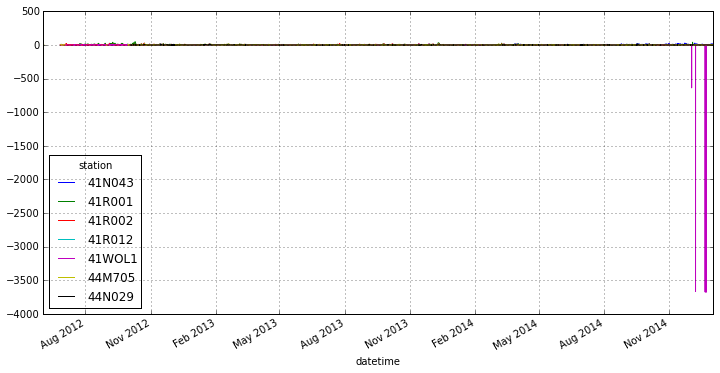

In [27]:
data.plot(figsize=(12,6))

In [28]:
data[data < 0] = np.nan

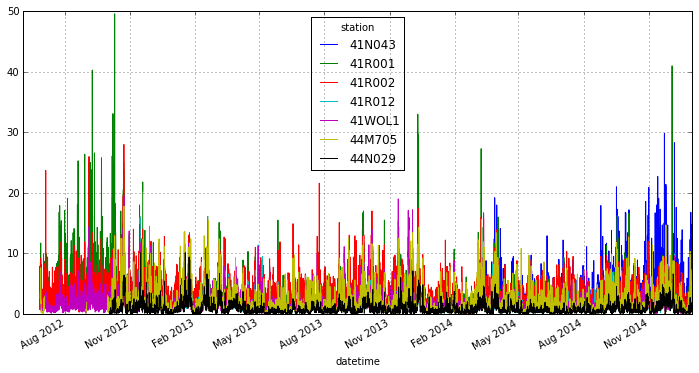

In [29]:
data.plot(figsize=(12,6))

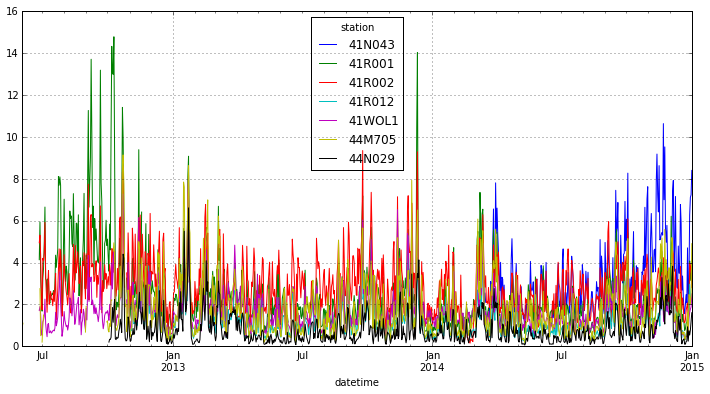

In [30]:
data.resample('D').plot(figsize=(12,6))

## Analysing the data

In [31]:
data = data.loc['2013':'2014', ['41R001', '44N029', '44M705']]

**Exercise**: plot the daily data of 2014 for the '41R001' and the '44N029' stations (Sint-Jans-Molembeek and Houtem (Veurne))

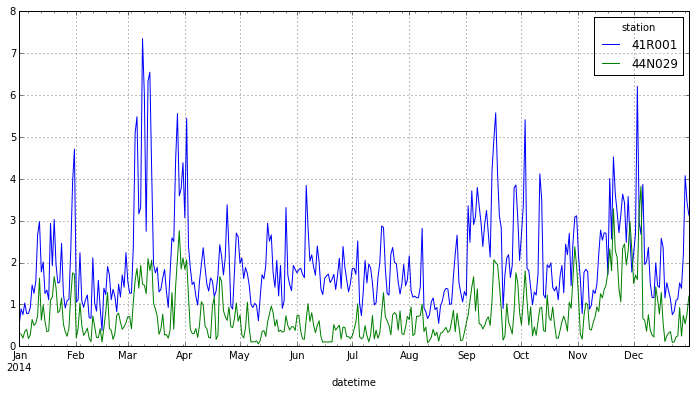

In [32]:
data.loc['2014', ['41R001', '44N029']].resample('D').plot(figsize=(12,6))

**Exercise**: calculate the number of days with a daily mean above the limit of 5 µg/m3 per year

In [33]:
# daily means
data_daily = data.resample('D')

In [34]:
# daily mean above 5?
data_daily_above = data_daily > 5

In [35]:
# group by year and count occurences above 5 (sum of boolean)
data_daily_above.groupby(data_daily_above.index.year).sum()

station,41R001,44N029,44M705
2013,14,2,20
2014,11,0,8


**Exercise**: Visualize the typical week profile for the different stations as boxplots.

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns)

In [36]:
# add a weekday and week column
data['weekday'] = data.index.weekday
data['week'] = data.index.week
data.head()

station,41R001,44N029,44M705,weekday,week
datetime,,,,,
2013-01-01 00:00:00,0.7,0.2,0.3,1,1
2013-01-01 01:00:00,0.7,0.2,0.3,1,1
2013-01-01 02:00:00,0.6,0.2,0.3,1,1
2013-01-01 03:00:00,0.5,0.2,0.3,1,1
2013-01-01 04:00:00,0.5,0.2,0.3,1,1


In [37]:
# pivot table so that the weekdays are the different columns
data_pivoted = data['2014'].pivot_table(columns='weekday', index='week', values='41R001')
data_pivoted.head()

weekday,0,1,2,3,4,5,6
week,,,,,,,
1,4.075000,3.441667,1.827083,0.891667,0.754167,1.033333,0.779167
2,0.783333,0.920833,1.462500,1.262500,1.558333,2.675000,2.975000
3,1.775000,2.012500,1.258333,1.341667,1.108333,2.933333,1.925000
4,3.029167,1.941667,1.508333,1.529167,2.458333,1.245833,0.912500
5,1.087500,1.116667,2.283333,3.925000,4.708333,1.054167,1.108333


C:\Anaconda\lib\site-packages\pandas\tools\plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


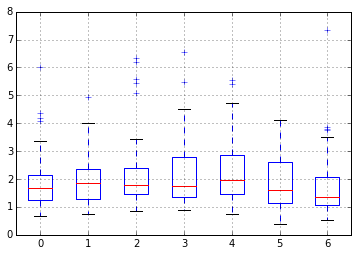

In [38]:
box = data_pivoted.boxplot()

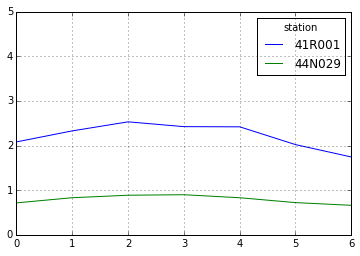

In [39]:
# alternative way
data[['41R001', '44N029']].groupby(data.index.weekday).mean().plot(ylim=[0,5])

In [40]:
data = data.drop(['weekday', 'week'], axis=1)

**Exercise**: Calculate the typical diurnal profile for the different stations

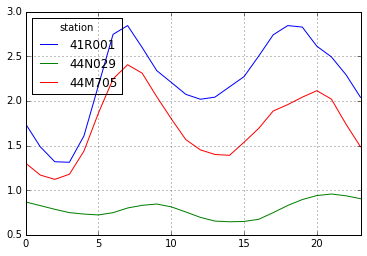

In [41]:
data.groupby(data.index.hour).mean().plot()

**Exercise**: Investigate the difference in the typical diurnal profile between week and weekend days.

Tip: `.isin`

In [42]:
data.index.weekday?

In [43]:
data['weekday'] = data.index.weekday

In [44]:
# add a column indicating week/weekend
data['weekend'] = data['weekday'].isin([5, 6])

In [45]:
data_weekend = data.groupby(['weekend', data.index.hour]).mean()
data_weekend.head()

station      41R001    44N029    44M705   weekday
weekend                                          
False   0  1.679242  0.884932  1.281496  1.998084
        1  1.418324  0.837165  1.152601  1.998084
        2  1.237037  0.787739  1.118304  1.998084
        3  1.263867  0.744828  1.212741  1.998084
        4  1.655469  0.727011  1.549807  1.998084

In [46]:
data_weekend_41R001 = data_weekend['41R001'].unstack(level=0)
data_weekend_41R001.head()

weekend,False,True
0,1.679242,1.892537
1,1.418324,1.654369
2,1.237037,1.520874
3,1.263867,1.432524
4,1.655469,1.488835


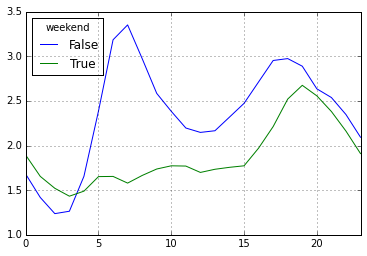

In [47]:
data_weekend_41R001.plot()

**Exercise**: Calculate the correlation between the different stations

In [48]:
data[['41R001', '44N029', '44M705']].corr()

station,41R001,44N029,44M705
station,,,
41R001,1.000000,0.521395,0.681068
44N029,0.521395,1.000000,0.708449
44M705,0.681068,0.708449,1.000000


In [49]:
data[['41R001', '44N029', '44M705']].resample('D').corr()

station,41R001,44N029,44M705
station,,,
41R001,1.000000,0.720812,0.829006
44N029,0.720812,1.000000,0.861887
44M705,0.829006,0.861887,1.000000
